In [25]:
import pandas as pd
import numpy as np

In [26]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [27]:
df = pd.read_excel("Car_Features_and_Price (1).xlsx")

In [28]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [29]:
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Data cleaning

In [30]:
df['Number of Doors'].value_counts()

4.0    8353
2.0    3160
3.0     395
Name: Number of Doors, dtype: int64

In [31]:
df['Engine Cylinders'].value_counts()

4.0     4752
6.0     4489
8.0     2031
12.0     230
5.0      225
10.0      68
0.0       56
3.0       30
16.0       3
Name: Engine Cylinders, dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [33]:
df['Engine HP'] = df['Engine HP'].fillna(0).astype(int)

In [34]:
df['Engine Cylinders'] = df['Engine Cylinders'].fillna(0).astype(int)

In [35]:
df['Number of Doors'] = df['Number of Doors'].fillna(0).astype(int)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Make               11914 non-null  object
 1   Model              11914 non-null  object
 2   Year               11914 non-null  int64 
 3   Engine Fuel Type   11911 non-null  object
 4   Engine HP          11914 non-null  int32 
 5   Engine Cylinders   11914 non-null  int32 
 6   Transmission Type  11914 non-null  object
 7   Driven_Wheels      11914 non-null  object
 8   Number of Doors    11914 non-null  int32 
 9   Market Category    8172 non-null   object
 10  Vehicle Size       11914 non-null  object
 11  Vehicle Style      11914 non-null  object
 12  highway MPG        11914 non-null  int64 
 13  city mpg           11914 non-null  int64 
 14  Popularity         11914 non-null  int64 
 15  MSRP               11914 non-null  int64 
dtypes: int32(3), int64(5), object(8)
memory 

df['Number of Doors'] = df['Number of Doors'].astype(object)

In [37]:
df.shape

(11914, 16)

# Checking Duplicates

In [38]:
df.duplicated().sum()

715

In [39]:
df.drop_duplicates(inplace=True)

In [40]:
df.duplicated().sum()

0

In [41]:
df.shape

(11199, 16)

In [42]:
df.reset_index(drop=True)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11194,Acura,ZDX,2012,premium unleaded (required),300,6,AUTOMATIC,all wheel drive,4,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11195,Acura,ZDX,2012,premium unleaded (required),300,6,AUTOMATIC,all wheel drive,4,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11196,Acura,ZDX,2012,premium unleaded (required),300,6,AUTOMATIC,all wheel drive,4,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11197,Acura,ZDX,2013,premium unleaded (recommended),300,6,AUTOMATIC,all wheel drive,4,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


# Missing values

In [43]:
df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      3376
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

Categorical values replaces with mode() i.e[Number of Doors, Market Category,Engine Fuel Type]

In [44]:
df["Number of Doors"].mode()

0    4
Name: Number of Doors, dtype: int32

In [45]:
md=df["Number of Doors"].mode()[0]
df["Number of Doors"].replace(np.nan,md, inplace=True)
df["Number of Doors"].isna().sum()

0

In [46]:
df["Market Category"].mode()

0    Crossover
Name: Market Category, dtype: object

In [47]:
md=df["Market Category"].mode()[0]
df["Market Category"].replace(np.nan,md, inplace=True)
df["Market Category"].isna().sum()

0

In [48]:
df["Engine Fuel Type"].mode()

0    regular unleaded
Name: Engine Fuel Type, dtype: object

In [49]:
md=df["Engine Fuel Type"].mode()[0]
df["Engine Fuel Type"].replace(np.nan,md, inplace=True)
df["Engine Fuel Type"].isna().sum()

0

In [50]:
df.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [51]:
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,Luxury,Compact,Convertible,28,18,3916,34500


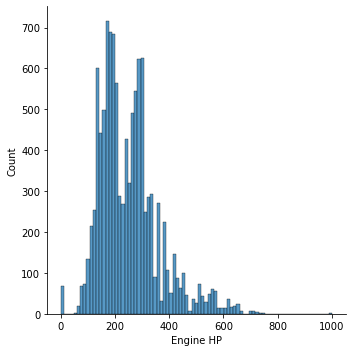

In [52]:
import seaborn as sns
sns.displot(df["Engine HP"])

In [53]:
from scipy.stats import shapiro
[0.1,0.05,0.01]
stat,p=shapiro(df["Engine HP"])
if p>0.1:
    print("it follows normal distribution")
else:
    print("not normal distribution")

not normal distribution


C:\Users\Bharath Atla\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Graph follows normal distribution. so replace with mean

In [54]:
df['Engine HP'].value_counts()

200    378
170    261
240    251
285    246
210    243
      ... 
372      1
154      1
361      1
451      1
151      1
Name: Engine HP, Length: 357, dtype: int64

In [55]:
df["Engine HP"].mean()

251.82766318421287

In [56]:
df['Engine HP'].fillna(df['Engine HP'].mean(), inplace = True)

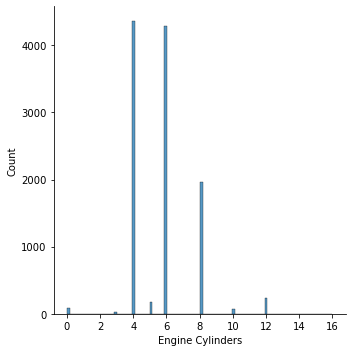

In [57]:
sns.displot(df["Engine Cylinders"])

In [58]:
from scipy.stats import shapiro
[0.1,0.05,0.01]
stat,p=shapiro(df["Engine Cylinders"])
if p>0.1:
    print("it follows normal distribution")
else:
    print("not normal distribution")

not normal distribution


C:\Users\Bharath Atla\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Graph follows normal distribution. so replace with mean()

In [59]:
df['Engine Cylinders'].median()

6.0

In [60]:
df['Engine Cylinders'].fillna(df['Engine Cylinders'].median(), inplace = True)

In [61]:
df.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

Finally No Missing values 

# Outliers

In [62]:
df.dtypes

Make                 object
Model                object
Year                  int64
Engine Fuel Type     object
Engine HP             int32
Engine Cylinders      int32
Transmission Type    object
Driven_Wheels        object
Number of Doors       int32
Market Category      object
Vehicle Size         object
Vehicle Style        object
highway MPG           int64
city mpg              int64
Popularity            int64
MSRP                  int64
dtype: object

df['Number of Doors'] = df['Number of Doors'].astype(object)

df['Engine Cylinders'] = df['Engine Cylinders'].astype(object)

In [63]:
df.dtypes

Make                 object
Model                object
Year                  int64
Engine Fuel Type     object
Engine HP             int32
Engine Cylinders      int32
Transmission Type    object
Driven_Wheels        object
Number of Doors       int32
Market Category      object
Vehicle Size         object
Vehicle Style        object
highway MPG           int64
city mpg              int64
Popularity            int64
MSRP                  int64
dtype: object

In [64]:
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,Luxury,Compact,Convertible,28,18,3916,34500


C:\Users\Bharath Atla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year'>

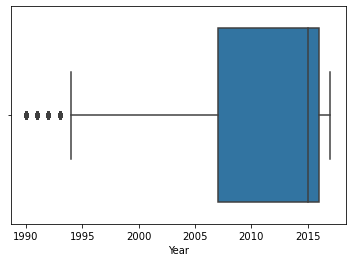

In [65]:
import seaborn
sns.boxplot(df["Year"])

In [66]:
import numpy as np
col=df["Year"]
q1=np.quantile(col, 0.25)
q3=np.quantile(col, 0.75)
iqr=q3-q1
med=col.median()
for i in col:
    if i<q1-1.5*iqr or i>q3+1.5*iqr:
        print(i,q1-1.5*iqr,q3+1.5*iqr)
        col.replace(i,med,inplace=True)

1992 1993.5 2029.5
1993 1993.5 2029.5
1991 1993.5 2029.5
1990 1993.5 2029.5


C:\Users\Bharath Atla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Engine HP'>

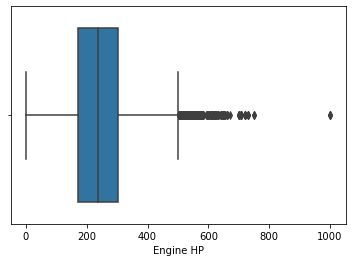

In [67]:
sns.boxplot(df["Engine HP"])

In [68]:
import numpy as np
col=df["Engine HP"]
q1=np.quantile(col, 0.25)
q3=np.quantile(col, 0.75)
iqr=q3-q1
med=col.median()
for i in col:
    if i<q1-1.5*iqr or i>q3+1.5*iqr:
        print(i,q1-1.5*iqr,q3+1.5*iqr)
        col.replace(i,med,inplace=True)

562 -29.5 502.5
597 -29.5 502.5
515 -29.5 502.5
543 -29.5 502.5
631 -29.5 502.5
604 -29.5 502.5
620 -29.5 502.5
611 -29.5 502.5
661 -29.5 502.5
532 -29.5 502.5
641 -29.5 502.5
535 -29.5 502.5
520 -29.5 502.5
560 -29.5 502.5
540 -29.5 502.5
580 -29.5 502.5
600 -29.5 502.5
503 -29.5 502.5
700 -29.5 502.5
720 -29.5 502.5
750 -29.5 502.5
530 -29.5 502.5
553 -29.5 502.5
505 -29.5 502.5
650 -29.5 502.5
605 -29.5 502.5
570 -29.5 502.5
707 -29.5 502.5
621 -29.5 502.5
510 -29.5 502.5
536 -29.5 502.5
577 -29.5 502.5
552 -29.5 502.5
626 -29.5 502.5
616 -29.5 502.5
572 -29.5 502.5
521 -29.5 502.5
567 -29.5 502.5
582 -29.5 502.5
556 -29.5 502.5
640 -29.5 502.5
563 -29.5 502.5
550 -29.5 502.5
660 -29.5 502.5
731 -29.5 502.5
651 -29.5 502.5
545 -29.5 502.5
565 -29.5 502.5
610 -29.5 502.5
518 -29.5 502.5
523 -29.5 502.5
592 -29.5 502.5
632 -29.5 502.5
670 -29.5 502.5
573 -29.5 502.5
525 -29.5 502.5
526 -29.5 502.5
662 -29.5 502.5
557 -29.5 502.5
617 -29.5 502.5
583 -29.5 502.5
622 -29.5 502.5
568 -29.

C:\Users\Bharath Atla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Engine Cylinders'>

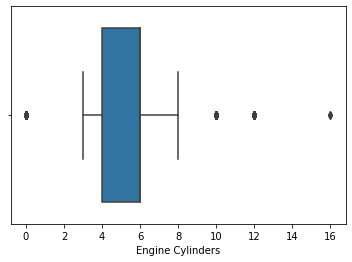

In [69]:
sns.boxplot(df['Engine Cylinders'])

In [70]:
import numpy as np
col=df["Engine Cylinders"]
q1=np.quantile(col, 0.25)
q3=np.quantile(col, 0.75)
iqr=q3-q1
med=col.median()
for i in col:
    if i<q1-1.5*iqr or i>q3+1.5*iqr:
        print(i,q1-1.5*iqr,q3+1.5*iqr)
        col.replace(i,med,inplace=True)

12 1.0 9.0
0 1.0 9.0
10 1.0 9.0
16 1.0 9.0


C:\Users\Bharath Atla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='highway MPG'>

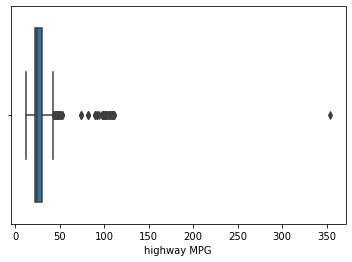

In [71]:
sns.boxplot(df['highway MPG'])

In [72]:
import numpy as np
col=df["highway MPG"]
q1=np.quantile(col, 0.25)
q3=np.quantile(col, 0.75)
iqr=q3-q1
med=col.median()
for i in col:
    if i<q1-1.5*iqr or i>q3+1.5*iqr:
        print(i,q1-1.5*iqr,q3+1.5*iqr)
        col.replace(i,med,inplace=True)

45 10.0 42.0
43 10.0 42.0
108 10.0 42.0
103 10.0 42.0
354 10.0 42.0
47 10.0 42.0
46 10.0 42.0
82 10.0 42.0
110 10.0 42.0
44 10.0 42.0
105 10.0 42.0
99 10.0 42.0
102 10.0 42.0
111 10.0 42.0
106 10.0 42.0
48 10.0 42.0
101 10.0 42.0
90 10.0 42.0
97 10.0 42.0
94 10.0 42.0
98 10.0 42.0
100 10.0 42.0
107 10.0 42.0
53 10.0 42.0
50 10.0 42.0
74 10.0 42.0
92 10.0 42.0
109 10.0 42.0


C:\Users\Bharath Atla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city mpg'>

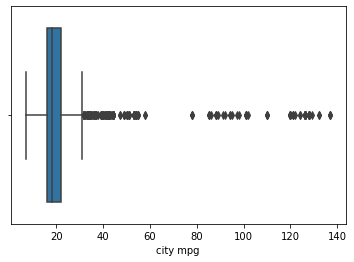

In [73]:
sns.boxplot(df['city mpg'])

In [74]:
import numpy as np
col=df["city mpg"]
q1=np.quantile(col, 0.25)
q3=np.quantile(col, 0.75)
iqr=q3-q1
med=col.median()
for i in col:
    if i<q1-1.5*iqr or i>q3+1.5*iqr:
        print(i,q1-1.5*iqr,q3+1.5*iqr)
        col.replace(i,med,inplace=True)

32 7.0 31.0
122 7.0 31.0
121 7.0 31.0
50 7.0 31.0
49 7.0 31.0
47 7.0 31.0
35 7.0 31.0
33 7.0 31.0
40 7.0 31.0
85 7.0 31.0
128 7.0 31.0
42 7.0 31.0
43 7.0 31.0
36 7.0 31.0
44 7.0 31.0
126 7.0 31.0
34 7.0 31.0
132 7.0 31.0
110 7.0 31.0
137 7.0 31.0
129 7.0 31.0
39 7.0 31.0
41 7.0 31.0
124 7.0 31.0
37 7.0 31.0
88 7.0 31.0
94 7.0 31.0
86 7.0 31.0
101 7.0 31.0
95 7.0 31.0
89 7.0 31.0
102 7.0 31.0
98 7.0 31.0
92 7.0 31.0
97 7.0 31.0
91 7.0 31.0
53 7.0 31.0
55 7.0 31.0
51 7.0 31.0
54 7.0 31.0
58 7.0 31.0
78 7.0 31.0
38 7.0 31.0
120 7.0 31.0


C:\Users\Bharath Atla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Popularity'>

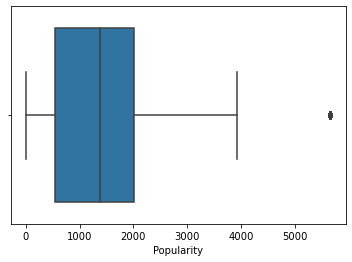

In [75]:
sns.boxplot(df['Popularity'])

In [76]:
import numpy as np
col=df["Popularity"]
q1=np.quantile(col, 0.25)
q3=np.quantile(col, 0.75)
iqr=q3-q1
med=col.median()
for i in col:
    if i<q1-1.5*iqr or i>q3+1.5*iqr:
        print(i,q1-1.5*iqr,q3+1.5*iqr)
        col.replace(i,med,inplace=True)

5657 -1641.0 4199.0


In [77]:
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,Luxury,Compact,Convertible,28,18,3916,34500


In [78]:
df.describe(include="object")

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style
count,11199,11199,11199,11199,11199,11199,11199,11199
unique,48,914,10,5,4,71,3,16
top,Chevrolet,Silverado 1500,regular unleaded,AUTOMATIC,front wheel drive,Crossover,Compact,Sedan
freq,1083,156,6661,7932,4354,4451,4395,2843


In [79]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [80]:
df['transmission_type'].value_counts()

AUTOMATIC           7932
MANUAL              2634
AUTOMATED_MANUAL     553
DIRECT_DRIVE          68
UNKNOWN               12
Name: transmission_type, dtype: int64

Try and remove that Unknown

In [81]:
df.drop(df.loc[df['transmission_type']=='unknown'].index, inplace=True)

In [82]:
df.shape

(11199, 16)

In [83]:
df.reset_index(drop=True)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11194,Acura,ZDX,2012,premium unleaded (required),300,6,AUTOMATIC,all wheel drive,4,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11195,Acura,ZDX,2012,premium unleaded (required),300,6,AUTOMATIC,all wheel drive,4,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11196,Acura,ZDX,2012,premium unleaded (required),300,6,AUTOMATIC,all wheel drive,4,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11197,Acura,ZDX,2013,premium unleaded (recommended),300,6,AUTOMATIC,all wheel drive,4,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


# Feature selection

Continuos = Regplot or correlation
Categorical = boxplot/barlot or Anova test

In [84]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)
categorical

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [85]:
for col in categorical:
    df[col] = df[col].astype(str).str.lower().str.replace(" ", "_")


In [86]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series,2011,premium_unleaded_(required),335,6,manual,rear_wheel_drive,2,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300,6,manual,rear_wheel_drive,2,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300,6,manual,rear_wheel_drive,2,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230,6,manual,rear_wheel_drive,2,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230,6,manual,rear_wheel_drive,2,luxury,compact,convertible,28,18,3916,34500


In [87]:
#split attributes into categorical and continous
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
contdf = df.select_dtypes(include=numerics)
catdf=df.drop(contdf.columns,axis=1)
print("continous attributes")
print(contdf.head(5))
print("categorical attributes")
print(catdf.head(5))

continous attributes
   year  engine_hp  engine_cylinders  number_of_doors  highway_mpg  city_mpg  \
0  2011        335                 6                2           26        19   
1  2011        300                 6                2           28        19   
2  2011        300                 6                2           28        20   
3  2011        230                 6                2           28        18   
4  2011        230                 6                2           28        18   

   popularity   msrp  
0        3916  46135  
1        3916  40650  
2        3916  36350  
3        3916  29450  
4        3916  34500  
categorical attributes
  make     model             engine_fuel_type transmission_type  \
0  bmw  1_series  premium_unleaded_(required)            manual   
1  bmw  1_series  premium_unleaded_(required)            manual   
2  bmw  1_series  premium_unleaded_(required)            manual   
3  bmw  1_series  premium_unleaded_(required)            manual   
4 

In [88]:
catdf = pd.concat([catdf,contdf['engine_cylinders']],axis=1)
contdf.drop(['engine_cylinders'],axis=1,inplace=True)

In [89]:
catdf = pd.concat([catdf,contdf['number_of_doors']],axis=1)
contdf.drop(['number_of_doors'],axis=1,inplace=True)

In [90]:
contdf.head(5)

,year,engine_hp,highway_mpg,city_mpg,popularity,msrp
0,2011,335,26,19,3916,46135
1,2011,300,28,19,3916,40650
2,2011,300,28,20,3916,36350
3,2011,230,28,18,3916,29450
4,2011,230,28,18,3916,34500


In [91]:
catdf.head(5)

,make,model,engine_fuel_type,transmission_type,driven_wheels,market_category,vehicle_size,vehicle_style,engine_cylinders,number_of_doors
0,bmw,1_series,premium_unleaded_(required),manual,rear_wheel_drive,"factory_tuner,luxury,high-performance",compact,coupe,6,2
1,bmw,1_series,premium_unleaded_(required),manual,rear_wheel_drive,"luxury,performance",compact,convertible,6,2
2,bmw,1_series,premium_unleaded_(required),manual,rear_wheel_drive,"luxury,high-performance",compact,coupe,6,2
3,bmw,1_series,premium_unleaded_(required),manual,rear_wheel_drive,"luxury,performance",compact,coupe,6,2
4,bmw,1_series,premium_unleaded_(required),manual,rear_wheel_drive,luxury,compact,convertible,6,2


# Continuous

In [92]:
contdf.columns

Index(['year', 'engine_hp', 'highway_mpg', 'city_mpg', 'popularity', 'msrp'], dtype='object')

Using regplot for continuos attributes

C:\Users\Bharath Atla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Bharath Atla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Bharath Atla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C

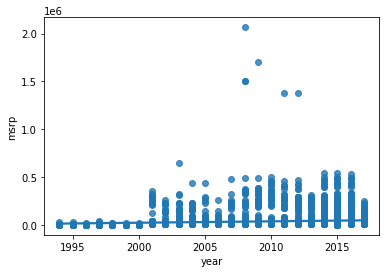

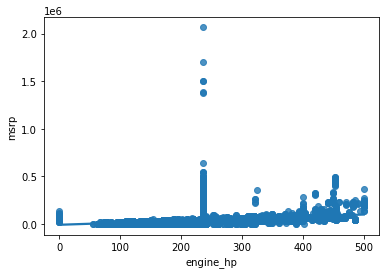

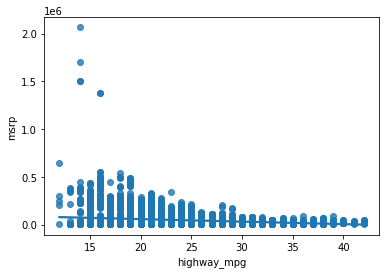

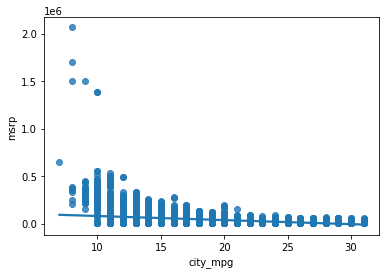

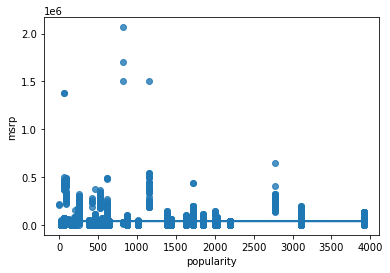

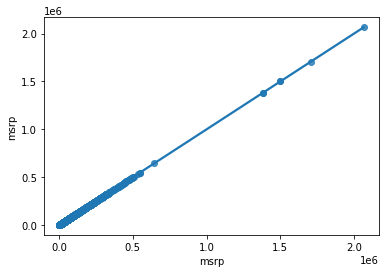

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
for i, col in enumerate(contdf.columns):
    plt.figure(i)
    sns.regplot(df[col], df["msrp"])

Using correlation for continuos attributes

In [94]:
contdf.corr().style.background_gradient("copper_r")

,year,engine_hp,highway_mpg,city_mpg,popularity,msrp
year,1.000000,0.244021,0.308247,0.262255,0.171467,0.146052
engine_hp,0.244021,1.000000,-0.427729,-0.500179,0.096734,0.303479
highway_mpg,0.308247,-0.427729,1.000000,0.900965,0.060792,-0.251733
city_mpg,0.262255,-0.500179,0.900965,1.000000,0.046239,-0.311849
popularity,0.171467,0.096734,0.060792,0.046239,1.000000,-0.001514
msrp,0.146052,0.303479,-0.251733,-0.311849,-0.001514,1.000000


In [95]:
contdf.corr()["msrp"]

year           0.146052
engine_hp      0.303479
highway_mpg   -0.251733
city_mpg      -0.311849
popularity    -0.001514
msrp           1.000000
Name: msrp, dtype: float64

# Categorical

In [96]:
catdf.columns

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style',
       'engine_cylinders', 'number_of_doors'],
      dtype='object')

In [97]:
catdf.head(5)

,make,model,engine_fuel_type,transmission_type,driven_wheels,market_category,vehicle_size,vehicle_style,engine_cylinders,number_of_doors
0,bmw,1_series,premium_unleaded_(required),manual,rear_wheel_drive,"factory_tuner,luxury,high-performance",compact,coupe,6,2
1,bmw,1_series,premium_unleaded_(required),manual,rear_wheel_drive,"luxury,performance",compact,convertible,6,2
2,bmw,1_series,premium_unleaded_(required),manual,rear_wheel_drive,"luxury,high-performance",compact,coupe,6,2
3,bmw,1_series,premium_unleaded_(required),manual,rear_wheel_drive,"luxury,performance",compact,coupe,6,2
4,bmw,1_series,premium_unleaded_(required),manual,rear_wheel_drive,luxury,compact,convertible,6,2


Using bar plot for categorical attributes

In [98]:
def sort_order(column):
    orders = (df.groupby([column]).mean().sort_values(by ='msrp', ascending = False)).index
    return orders

C:\Users\Bharath Atla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


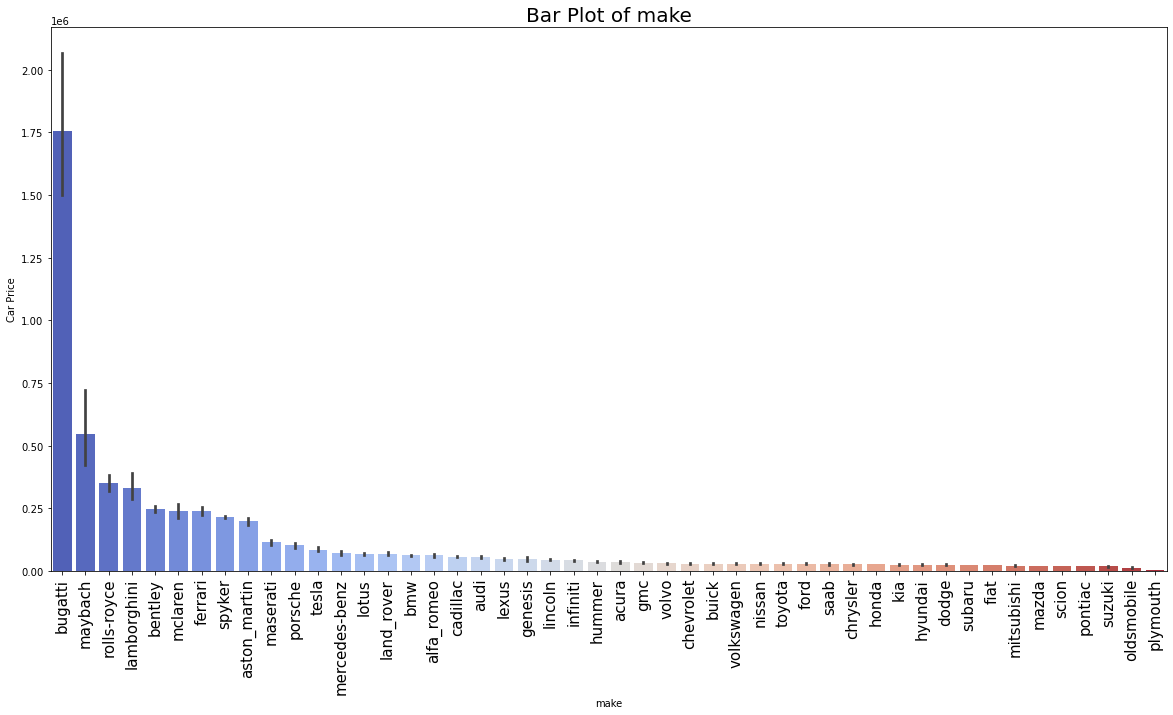

C:\Users\Bharath Atla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


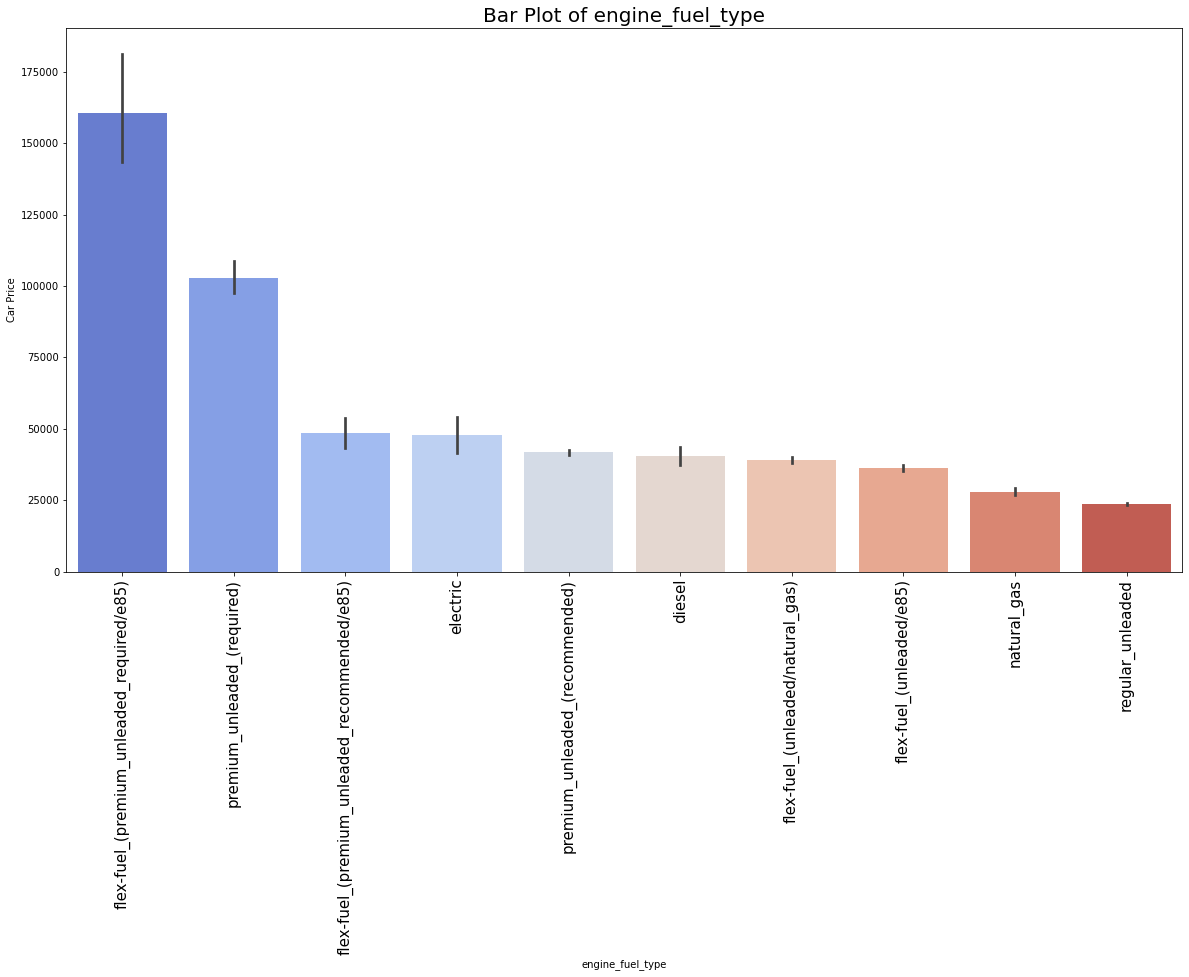

C:\Users\Bharath Atla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


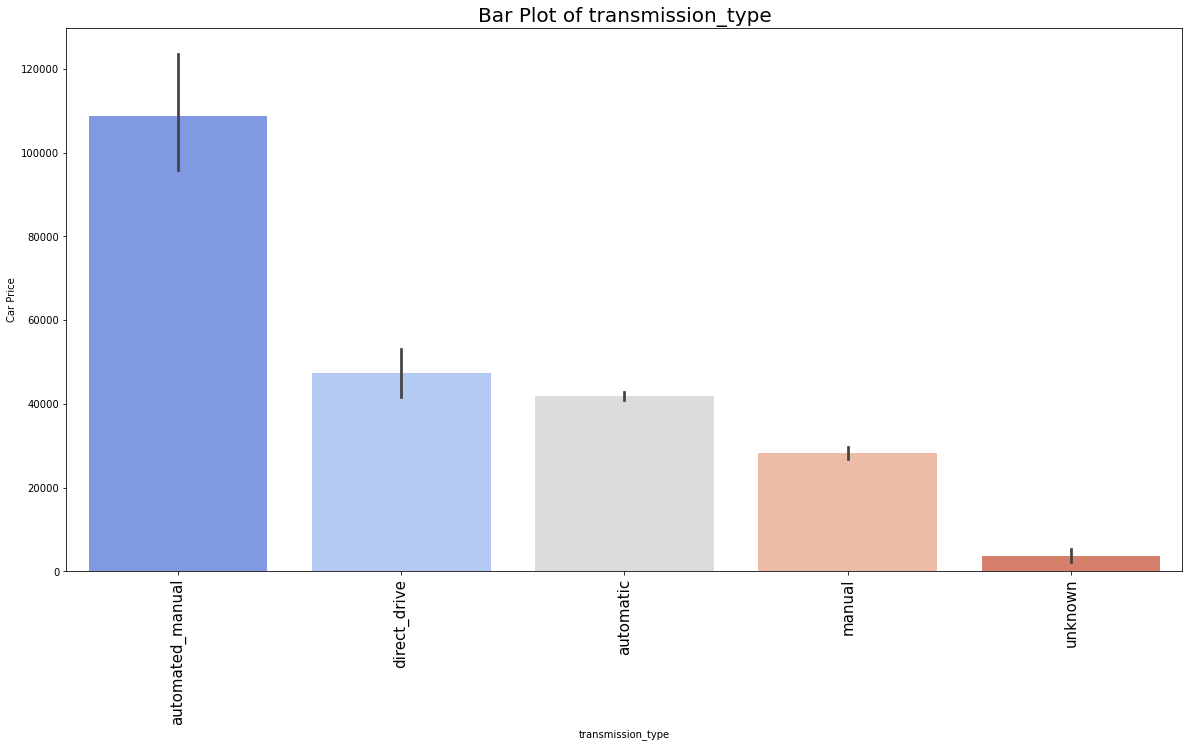

C:\Users\Bharath Atla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


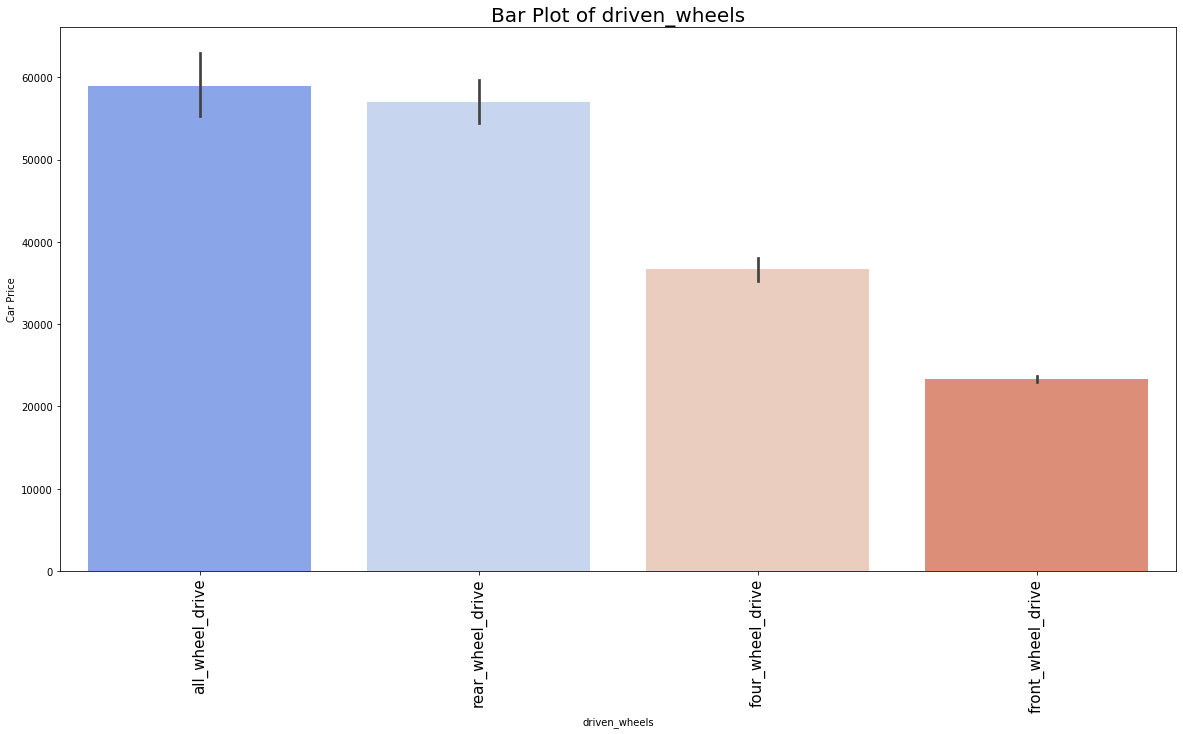

C:\Users\Bharath Atla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


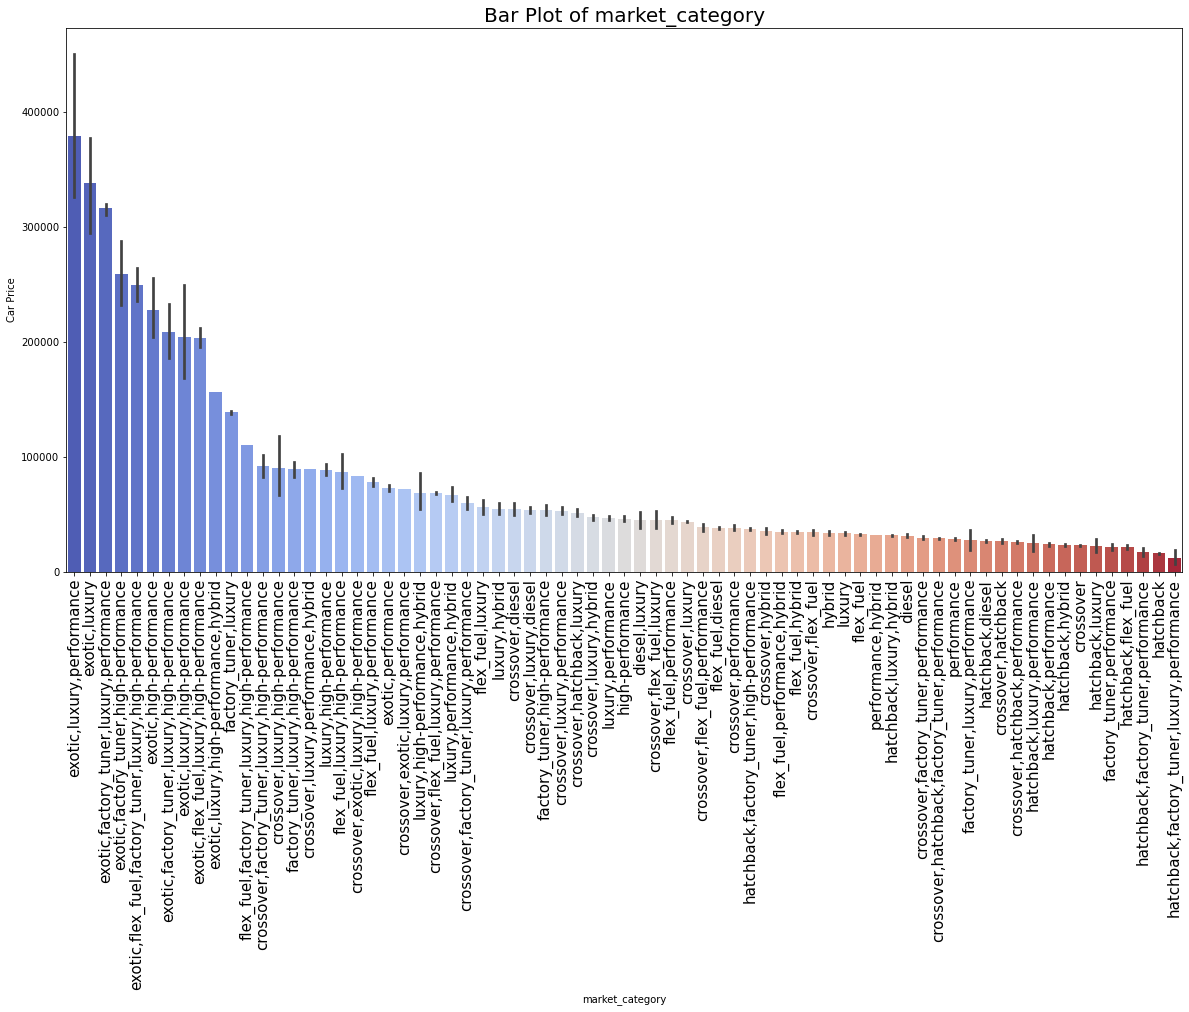

C:\Users\Bharath Atla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


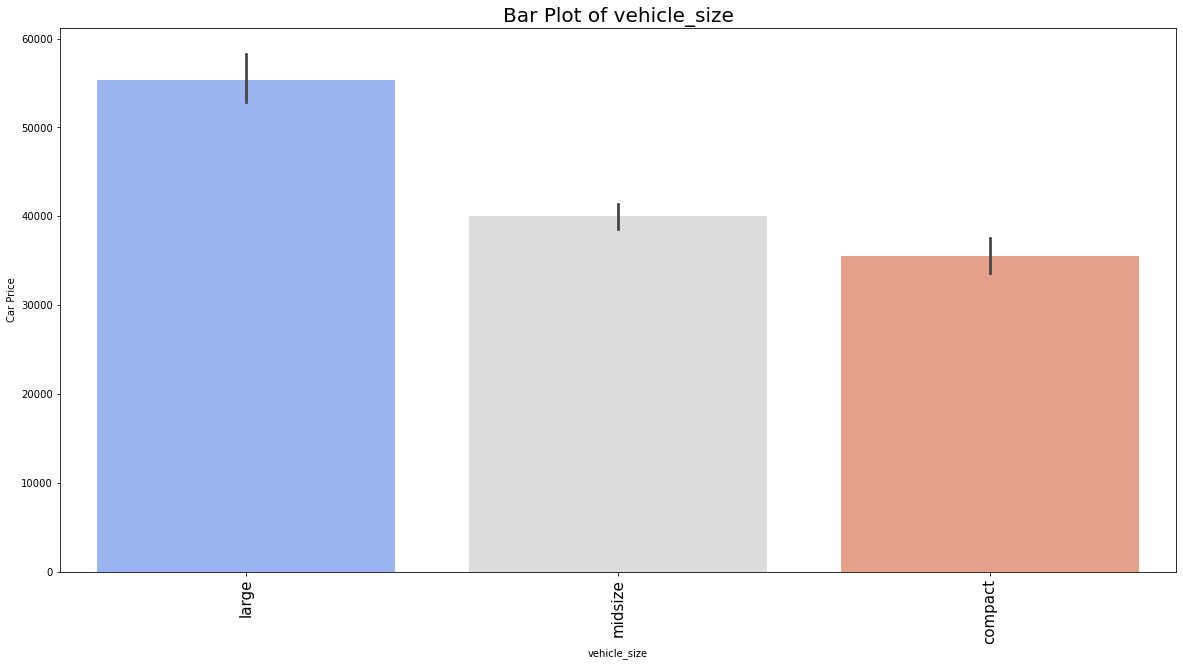

C:\Users\Bharath Atla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


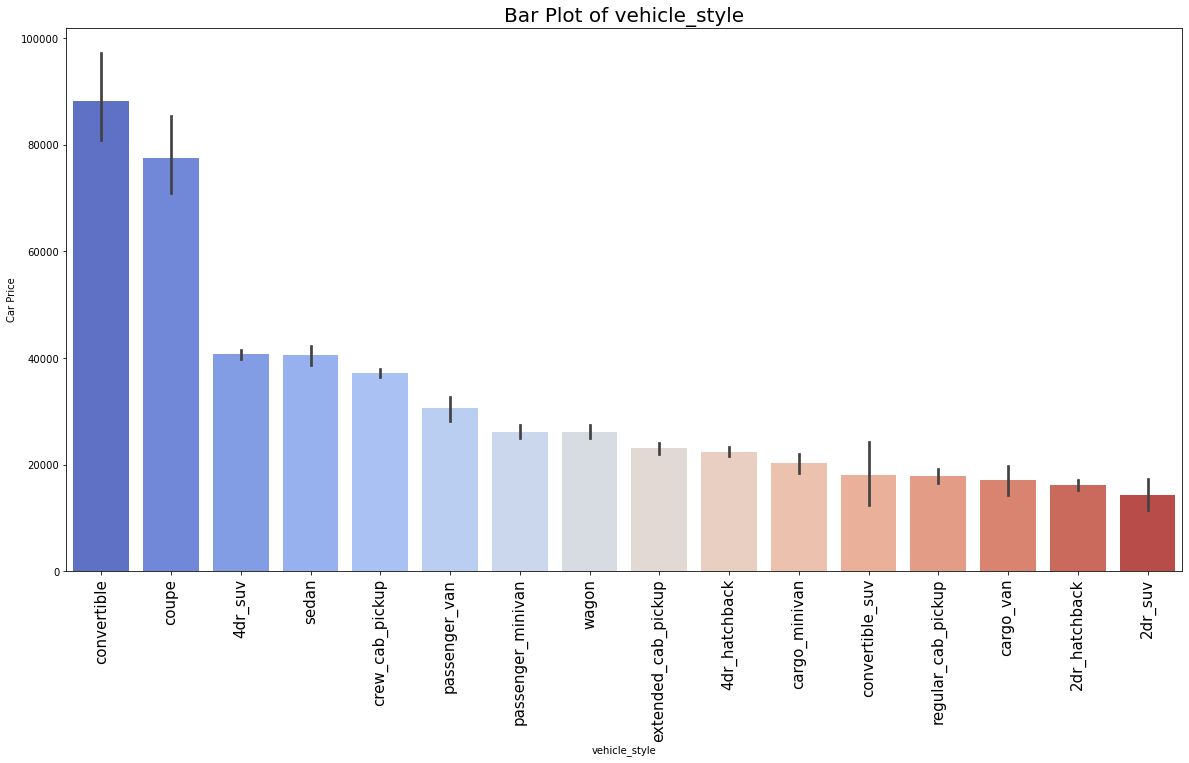

C:\Users\Bharath Atla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


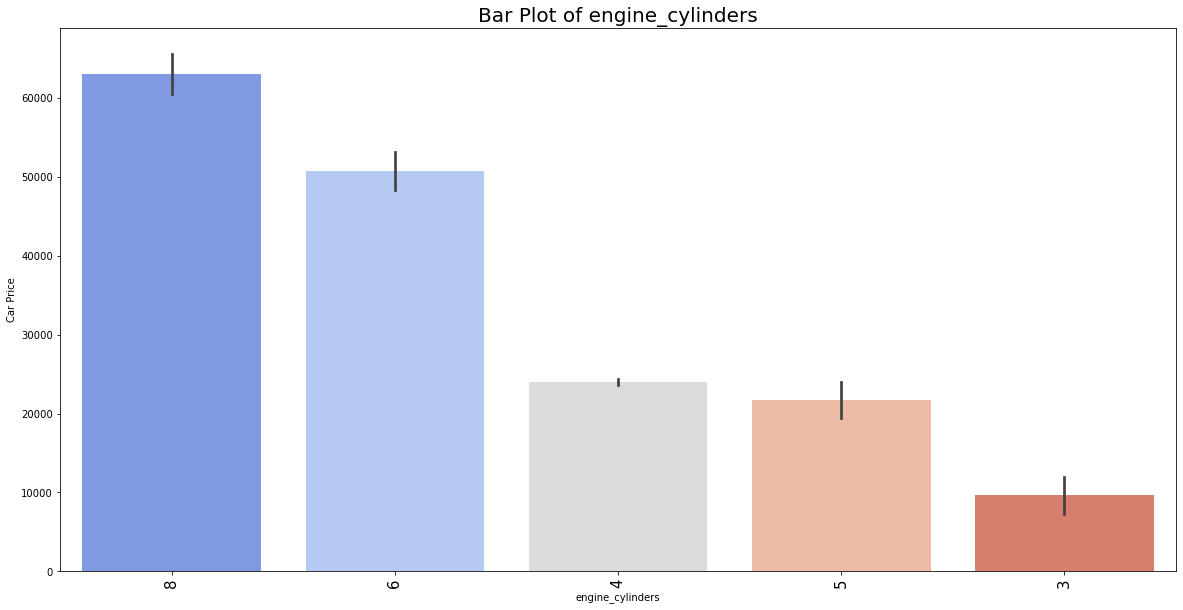

C:\Users\Bharath Atla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


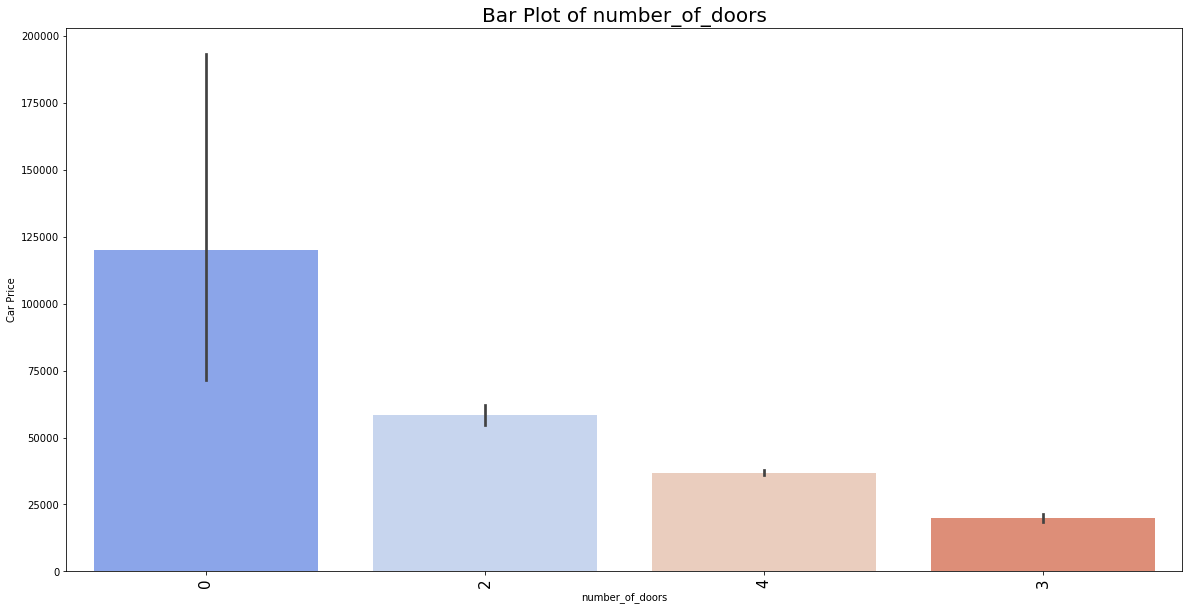

In [99]:
for i in catdf:
    if df[i].nunique() < 72:
        f,ax=plt.subplots(figsize=(20,10))
        sns.barplot(df[i],df['msrp'], order = sort_order(i), palette='coolwarm')
        plt.title("Bar Plot of %s" %i, fontsize = 20)
        plt.xticks(fontsize = 12)
        plt.xlabel("%s"%i)
        plt.ylabel("Car Price")
        plt.xticks(fontsize = 15, rotation = 90)
        plt.show();
        print('\n')

These bar graphs represents individual categorical variable relation with dependent variable MSRP

Many groups in every variable have leads to high price in car.
Some of them are:

convertible and coupe in vehicle_style
large in vehicle_size
exotic, luxury, performance in market_category
all wheel drive and rear wheel drive in driven_wheels
automated-manual in transmission type
bugatti, maybach in vehicle_size

Using Anova test for categorical attributes

In [100]:
from scipy import stats
import scipy.stats

In [101]:
def select_cat(cat):
    grouped_test2=df[[cat, 'msrp']].groupby([cat])
    f_val, p_val = stats.f_oneway(*(grouped_test2.get_group(i)['msrp'] for i in df[cat].unique())) 
    print("f_statistics:",f_val,p_val)
    dfn1=len(df[cat].unique())-1
    dfd1=len(df[cat].index)-len(df[cat].unique())
    print("degree of freedom:",dfn1,dfd1)
    f_crit=scipy.stats.f.ppf(q=1-.05, dfn=dfn1, dfd=dfd1)
    print("f_critical:",f_crit)
    if f_val>f_crit and p_val<0.05:
        print(cat,"attribute accepted")
        print("_______________________________")
        return False
    else:
        print(cat,"attribute rejected")
        print("_______________________________")
        return True

In [102]:
for i in catdf:
    select_cat(i)

f_statistics: 739.6748296624527 0.0
degree of freedom: 47 11151
f_critical: 1.3628855372022792
make attribute accepted
_______________________________
f_statistics: 402.1212544807958 0.0
degree of freedom: 912 10286
f_critical: 1.082028012133468
model attribute accepted
_______________________________
f_statistics: 394.4457893621207 0.0
degree of freedom: 9 11189
f_critical: 1.880719787651389
engine_fuel_type attribute accepted
_______________________________
f_statistics: 211.4031092782728 3.785774486954832e-175
degree of freedom: 4 11194
f_critical: 2.3727257063284273
transmission_type attribute accepted
_______________________________
f_statistics: 278.7764631214758 1.6030562014288193e-174
degree of freedom: 3 11195
f_critical: 2.6057022904392833
driven_wheels attribute accepted
_______________________________
f_statistics: 194.30636654025176 0.0
degree of freedom: 70 11128
f_critical: 1.294611522718753
market_category attribute accepted
_______________________________
f_statistics:

# Spliting Dataset into Train and test

In [103]:
contdf.head(5)

,year,engine_hp,highway_mpg,city_mpg,popularity,msrp
0,2011,335,26,19,3916,46135
1,2011,300,28,19,3916,40650
2,2011,300,28,20,3916,36350
3,2011,230,28,18,3916,29450
4,2011,230,28,18,3916,34500


In [104]:
catdf.columns

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style',
       'engine_cylinders', 'number_of_doors'],
      dtype='object')

In [105]:
lst_imp = ['make', 'model', 'year', 'engine_fuel_type', 'engine_hp', 'engine_cylinders', 'transmission_type', 'driven_wheels', 'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style', 'highway_mpg', 'city_mpg', 'popularity']

In [106]:
lst_imp

['make',
 'model',
 'year',
 'engine_fuel_type',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'driven_wheels',
 'number_of_doors',
 'market_category',
 'vehicle_size',
 'vehicle_style',
 'highway_mpg',
 'city_mpg',
 'popularity']

Do label Encoding for categorical and Data scaling for numerical after splitting

In [107]:
x_data=df[lst_imp]
y_data=df["msrp"]

In [108]:
x_data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,bmw,1_series,2011,premium_unleaded_(required),335,6,manual,rear_wheel_drive,2,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916
1,bmw,1_series,2011,premium_unleaded_(required),300,6,manual,rear_wheel_drive,2,"luxury,performance",compact,convertible,28,19,3916
2,bmw,1_series,2011,premium_unleaded_(required),300,6,manual,rear_wheel_drive,2,"luxury,high-performance",compact,coupe,28,20,3916
3,bmw,1_series,2011,premium_unleaded_(required),230,6,manual,rear_wheel_drive,2,"luxury,performance",compact,coupe,28,18,3916
4,bmw,1_series,2011,premium_unleaded_(required),230,6,manual,rear_wheel_drive,2,luxury,compact,convertible,28,18,3916


In [109]:
y_data.head()

0    46135
1    40650
2    36350
3    29450
4    34500
Name: msrp, dtype: int64

In [110]:
x_data.dtypes

make                 object
model                object
year                  int64
engine_fuel_type     object
engine_hp             int32
engine_cylinders      int32
transmission_type    object
driven_wheels        object
number_of_doors       int32
market_category      object
vehicle_size         object
vehicle_style        object
highway_mpg           int64
city_mpg              int64
popularity            int64
dtype: object

In [111]:
cat_cols = ['make', 'model', 'engine_fuel_type', 'engine_cylinders', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']

In [112]:
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    x_data[col] = x_data[col].astype(object)
    le = LabelEncoder()
    le.fit(x_data[col])
    x_data[col] = le.transform(x_data[col])

C:\Users\Bharath Atla\AppData\Local\Temp\ipykernel_1876\4115964303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data[col] = x_data[col].astype(object)
C:\Users\Bharath Atla\AppData\Local\Temp\ipykernel_1876\4115964303.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data[col] = le.transform(x_data[col])
C:\Users\Bharath Atla\AppData\Local\Temp\ipykernel_1876\4115964303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [113]:
x_data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,5,3,2011,8,335,3,3,3,2,38,0,8,26,19,3916
1,5,3,2011,8,300,3,3,3,2,67,0,6,28,19,3916
2,5,3,2011,8,300,3,3,3,2,64,0,8,28,20,3916
3,5,3,2011,8,230,3,3,3,2,67,0,8,28,18,3916
4,5,3,2011,8,230,3,3,3,2,63,0,6,28,18,3916


In [114]:
y_data.head()

0    46135
1    40650
2    36350
3    29450
4    34500
Name: msrp, dtype: int64

In [115]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15,random_state=1)

In [116]:
x_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
3194,8,246,2012,9,318,3,1,0,2,67,2,8,27,18,1624
2802,9,207,2016,9,305,3,1,3,4,23,0,9,26,18,1385
3350,29,254,2017,9,146,1,1,0,4,0,0,3,32,27,586
11660,43,892,2004,9,185,3,1,1,4,0,2,3,20,15,481
9292,16,738,2007,9,295,4,1,3,4,0,1,10,19,14,549


In [117]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9519, 15)
(1680, 15)
(9519,)
(1680,)


# Regression Models 

R2 measures the proportion of variance in the dependent variable that is explained by the independent variable(s), while MSE measures the average squared difference between the predicted and actual values of the dependent variable.

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Multi Linear and Multi Polynomial Regression

In [119]:
# Multi Linear regression model
lr = LinearRegression() 
lr.fit(x_train, y_train)
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)
print("Multi Linear Regression - R2 score (train):", r2_score(y_train, y_pred_train))
print("Multi Linear Regression - R2 score (test):", r2_score(y_test, y_pred_test))
print("Multi Linear Regression - MSE (train):", mean_squared_error(y_train, y_pred_train))
print("Multi Linear Regression - MSE (test):", mean_squared_error(y_test, y_pred_test))
print("Multi Linear Regression - Bias:", np.mean(y_pred_test - y_test))
print("Multi Linear Regression - Variance:", np.var(y_pred_test))
print("___________________________________")
# Multi polynomial regression model
degree = 4  # adjust this parameter, change the degree to see best value suitable
poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly.fit(x_train, y_train)
y_pred_train = poly.predict(x_train)
y_pred_test = poly.predict(x_test)
print("Multi Polynomial Regression - R2 score (train):", r2_score(y_train, y_pred_train))
print("Multi Polynomial Regression - R2 score (test):", r2_score(y_test, y_pred_test))
print("Multi Polynomial Regression - MSE (train):", mean_squared_error(y_train, y_pred_train))
print("Mutli Polynomial Regression - MSE (test):", mean_squared_error(y_test, y_pred_test))
print("Multi Polynomial Regression - Bias:", np.mean(y_pred_test - y_test))
print("Multi Polynomial Regression - Variance:", np.var(y_pred_test))

Multi Linear Regression - R2 score (train): 0.2081196548443609
Multi Linear Regression - R2 score (test): 0.2319642551021036
Multi Linear Regression - MSE (train): 2911598529.1532755
Multi Linear Regression - MSE (test): 3371677282.5241013
Multi Linear Regression - Bias: -2810.756884709453
Multi Linear Regression - Variance: 785385266.1432596
___________________________________
Multi Polynomial Regression - R2 score (train): 0.9708180420076374
Multi Polynomial Regression - R2 score (test): -4.770237896160615
Multi Polynomial Regression - MSE (train): 107296697.64903171
Mutli Polynomial Regression - MSE (test): 25331347087.017197
Multi Polynomial Regression - Bias: 2610.7587427201724
Multi Polynomial Regression - Variance: 29956739883.445477


# Lasso and Ridge Regression

In [120]:
# apply Lasso regularization to avoid overfitting
alpha =100 # adjust this parameter to see best value suitable
lasso = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha))
lasso.fit(x_train, y_train)
y_pred_train = lasso.predict(x_train)
y_pred_test = lasso.predict(x_test)
print("Lasso Regression - R2 score (train):", r2_score(y_train, y_pred_train))
print("Lasso Regression - R2 score (test):", r2_score(y_test, y_pred_test))
print("Lasso Regression - MSE (train):", mean_squared_error(y_train, y_pred_train))
print("Lasso Regression - MSE (test):", mean_squared_error(y_test, y_pred_test))
print("Lasso Regression - Bias:", np.mean(y_pred_test - y_test))
print("Lasso Regression - Variance:", np.var(y_pred_test))
print("________________________________")
# apply Ridge regularization to avoid overfitting
alpha = 0.1  # adjust this parameter
ridge = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
ridge.fit(x_train, y_train)
y_pred_train = ridge.predict(x_train)
y_pred_test = ridge.predict(x_test)
print("Ridge Regression - R2 score (train):", r2_score(y_train, y_pred_train))
print("Ridge Regression - R2 score (test):", r2_score(y_test, y_pred_test))
print("Ridge Regression - MSE (train):", mean_squared_error(y_train, y_pred_train))
print("Ridge Regression - MSE (test):", mean_squared_error(y_test, y_pred_test))
print("Ridge Regression - Bias:", np.mean(y_pred_test - y_test))
print("Ridge Regression - Variance:", np.var(y_pred_test))

C:\Users\Bharath Atla\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.943e+12, tolerance: 3.500e+09
  model = cd_fast.enet_coordinate_descent(


Lasso Regression - R2 score (train): 0.8367656566571063
Lasso Regression - R2 score (test): 0.853278541401862
Lasso Regression - MSE (train): 600182687.8163748
Lasso Regression - MSE (test): 644107272.4810586
Lasso Regression - Bias: -187.98556106977463
Lasso Regression - Variance: 4394212289.994033
________________________________


C:\Users\Bharath Atla\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.77696e-34): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge Regression - R2 score (train): 0.9910216220551017
Ridge Regression - R2 score (test): -2.4652154759796185
Ridge Regression - MSE (train): 33011846.017481536
Ridge Regression - MSE (test): 15212297574.723753
Ridge Regression - Bias: 1715.299581654299
Ridge Regression - Variance: 19790212159.62346


# ENSEMBLE TECHNIQUES

# AVG VOTING

In [121]:
from sklearn.ensemble import VotingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# initialize base models
model1 = LinearRegression()
model2 = DecisionTreeRegressor()
model3 = RandomForestRegressor()

# create voting ensemble
ensemble = VotingRegressor(estimators=[('lr', model1), ('dt', model2), ('rf', model3)])

# fit the model on training data
ensemble.fit(x_train, y_train)

# make predictions on testing data
y_pred = ensemble.predict(x_test)

# calculate R2 score
r2 = r2_score(y_test, y_pred)

# calculate MSE
mse = mean_squared_error(y_test, y_pred)

print("AVG voting - R2 (train): ", r2_score(y_train, y_pred_train))
print("AVG voting - R2 (test): ", r2)
print("AVG voting - MSE (train): ", mean_squared_error(y_train, y_pred_train))
print("AVG voting - MSE (test): ", mse)

AVG voting - R2 (train):  0.9910216220551017
AVG voting - R2 (test):  0.9083003151050302
AVG voting - MSE (train):  33011846.017481536
AVG voting - MSE (test):  402561659.96035945


# WEIGHTED AVG VOTING

In [122]:
from sklearn.ensemble import VotingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# initialize base models
model1 = LinearRegression()
model2 = DecisionTreeRegressor()
model3 = RandomForestRegressor()

# create voting ensemble with weights
ensemble = VotingRegressor(estimators=[('lr', model1), ('dt', model2), ('rf', model3)], weights=[2, 1, 1])

# fit the model on training data
ensemble.fit(x_train, y_train)

# make predictions on testing data
y_pred = ensemble.predict(x_test)

# calculate R2 score
r2 = r2_score(y_test, y_pred)
print("Wighted AVG - R2 score (train): ", r2_score(y_train, y_pred_train))
print("Wighted AVG - R2 score (test): ", r2)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Weighted AVG - MSE (train): ", mean_squared_error(y_train, y_pred_train))
print("Weighted AVG - MSE (test): ", mse)

Wighted AVG - R2 score (train):  0.9910216220551017
Wighted AVG - R2 score (test):  0.81502852398823
Weighted AVG - MSE (train):  33011846.017481536
Weighted AVG - MSE (test):  812024866.9764026


# Stacking

In [123]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
import numpy as np

# initialize base models
model1 = RandomForestRegressor()
model2 = DecisionTreeRegressor()
model3 = SVR()

# initialize meta model
meta_model = LinearRegression()

# create k-fold object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# initialize empty arrays to store predictions
train_meta_features = np.zeros((x_train.shape[0], 3))
test_meta_features = np.zeros((x_test.shape[0], 3))

# create stacked ensemble
for i, model in enumerate([model1, model2, model3]):
    for train_index, test_index in kfold.split(x_train):
        x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[test_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        model.fit(x_train_fold, y_train_fold)
        y_pred = model.predict(x_val_fold)
        train_meta_features[test_index, i] = y_pred

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    test_meta_features[:, i] = y_pred

meta_model.fit(train_meta_features, y_train)
y_pred = meta_model.predict(test_meta_features)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Stacking - Mean Squared Error (train): ", mean_squared_error(y_train, y_pred_train))
print("Stacking - Mean Squared Error (test): ", mse)

# calculate R2 score
r2 = r2_score(y_test, y_pred)
print("Stacking - R2 Score (train): ", r2_score(y_train, y_pred_train))
print("Stacking - R2 Score (test): ", r2)

Stacking - Mean Squared Error (train):  33011846.017481536
Stacking - Mean Squared Error (test):  294192107.20967263
Stacking - R2 Score (train):  0.9910216220551017
Stacking - R2 Score (test):  0.9329858597751941


# BLENDING

In [124]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# initialize base models
model1 = RandomForestRegressor()
model2 = DecisionTreeRegressor()
model3 = SVR()

# split the training data into two parts
x_train1, x_train2, y_train1, y_train2 = train_test_split(x_train, y_train, test_size=0.5, random_state=42)

# train the base models on the first part of the training data
model1.fit(x_train1, y_train1)
model2.fit(x_train1, y_train1)
model3.fit(x_train1, y_train1)

# generate predictions on the second part of the training data
y_pred1 = model1.predict(x_train2)
y_pred2 = model2.predict(x_train2)
y_pred3 = model3.predict(x_train2)

# stack the predictions horizontally
train_meta_features = np.column_stack((y_pred1, y_pred2, y_pred3))

# train the meta model on the stacked predictions and the second part of the training data
meta_model = LinearRegression()
meta_model.fit(train_meta_features, y_train2)

# generate predictions on the testing data using the base models
y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test)
y_pred3 = model3.predict(x_test)

# stack the predictions horizontally
test_meta_features = np.column_stack((y_pred1, y_pred2, y_pred3))

# generate final predictions using the meta model
y_pred = meta_model.predict(test_meta_features)

# calculate R2 and MSE scores
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Blending - R2 score (train): ", r2_score(y_train, y_pred_train))
print("Blending - R2 score (test): ", r2)
print("Blending - MSE (train): ", mean_squared_error(y_train, y_pred_train))
print("Blending - MSE (test): ", mse)

Blending - R2 score (train):  0.9910216220551017
Blending - R2 score (test):  0.9222836476487452
Blending - MSE (train):  33011846.017481536
Blending - MSE (test):  341174823.4949659


# BAGGING META ESTIMATOR

In [125]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error


# initialize base estimator
base_estimator = DecisionTreeRegressor()

# initialize bagging meta estimator
bagging_model = BaggingRegressor(base_estimator=base_estimator,
                                  n_estimators=10,
                                  max_samples=0.8,
                                  max_features=0.8,
                                  n_jobs=-1,
                                  random_state=42)

# fit the model on the training data
bagging_model.fit(x_train, y_train)

y_pred_test = bagging_model.predict(x_test)
y_pred_train = bagging_model.predict(x_train)

# calculate r2 score
r2 = r2_score(y_test, y_pred_test)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred_test)

print("Bagging meta estimator - R2 score (train):", r2_score(y_train, y_pred_train))
print("Bagging meta estimator - R2 Score (test): ", r2)
print("Bagging meta estimator -MSE (train): ", mean_squared_error(y_train, y_pred_train))
print("Bagging meta estimator -MSE (test): ", mse)


C:\Users\Bharath Atla\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging meta estimator - R2 score (train): 0.9751126217023285
Bagging meta estimator - R2 Score (test):  0.9540701941219207
Bagging meta estimator -MSE (train):  91506317.19712594
Bagging meta estimator -MSE (test):  201631869.47822222


# Random Forest Regressor

In [126]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# initialize the model with specified parameters
rfr = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

# fit the model on the training data
rfr.fit(x_train, y_train)

# make predictions on the test data
y_pred = rfr.predict(x_test)

# calculate root mean squared error
rmse = np.sqrt(mse)

# calculate R2 score
r2 = r2_score(y_test, y_pred)

print("random forest -R2 Score (train): ", r2_score(y_train, y_pred_train))
print("random forest -R2 Score (test): ", r2)
print("random forest -MSE (train): ", mean_squared_error(y_train, y_pred_train))
print("random forest -MSE (test): ", mse)


random forest -R2 Score (train):  0.9751126217023285
random forest -R2 Score (test):  0.8820844413387583
random forest -MSE (train):  91506317.19712594
random forest -MSE (test):  201631869.47822222


# Boosting

# Ada boost

In [127]:
from sklearn.ensemble import AdaBoostRegressor

# Create an AdaBoost regressor
n_estimators = 100
learning_rate = 0.1
ada = AdaBoostRegressor(n_estimators=n_estimators, learning_rate=learning_rate)

# Fit the model to the training data
ada.fit(x_train, y_train)

# Make predictions on the test data
y_pred_test = ada.predict(x_test)

r2 = r2_score(y_test, y_pred_test)

mse = mean_squared_error(y_test, y_pred_test)

# Compute the R-squared score and mean squared error on the test data
from sklearn.metrics import r2_score, mean_squared_error
print("AdaBoost Regression - R2 score (train):", r2_score(y_train, y_pred_train))
print("AdaBoost Regression - R2 score (test):", r2)
print("AdaBoost Regression - MSE (train):", mean_squared_error(y_train, y_pred_train))
print("AdaBoost Regression - MSE (test):", mse)

AdaBoost Regression - R2 score (train): 0.9751126217023285
AdaBoost Regression - R2 score (test): 0.6681023426268037
AdaBoost Regression - MSE (train): 91506317.19712594
AdaBoost Regression - MSE (test): 1457030872.4849021


# Gradient boosting

In [128]:
from sklearn.ensemble import GradientBoostingRegressor

# define model and set hyperparameters
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# fit the model to training data
gb.fit(x_train, y_train)

# predict on test set and evaluate model
y_pred_test = gb.predict(x_test)
r2=r2_score(y_test, y_pred_test)
mse=mean_squared_error(y_test, y_pred_test)
print("Gradient Boosting - R2 score (train):", r2_score(y_train, y_pred_train) )
print("Gradient Boosting - R2 score (test):", r2 )
print("Gradient Boosting - MSE (train):", mean_squared_error(y_train, y_pred_train))
print("Gradient Boosting - MSE (test):", mse)

Gradient Boosting - R2 score (train): 0.9751126217023285
Gradient Boosting - R2 score (test): 0.8907548500056492
Gradient Boosting - MSE (train): 91506317.19712594
Gradient Boosting - MSE (test): 479586260.0260328


# XG Boost

In [129]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

# create an XGBRegressor object
xgbr = XGBRegressor(objective='reg:squarederror')

# fit the model on the training data
xgbr.fit(x_train, y_train)

# predict on the test set
y_pred_test = xgbr.predict(x_test)
y_pred_train = xgbr.predict(x_train)
# evaluate the model performance
print("XGBoost Regressor - R2 score (train):", r2_score(y_train, y_pred_train))
print("XGBoost Regressor - R2 score (test):", r2_score(y_test, y_pred_test))
print("XGBoost Regressor - MSE(train):", mean_squared_error(y_train, y_pred_train))
print("XGBoost Regressor - MSE(test):", mean_squared_error(y_test, y_pred_test))

XGBoost Regressor - R2 score (train): 0.9957518260017642
XGBoost Regressor - R2 score (test): 0.9362094577516088
XGBoost Regressor - MSE(train): 15619755.232616352
XGBoost Regressor - MSE(test): 280040510.57205385


# BAGGING META ESTIMATOR is the best performing model, with R2(train) score of 0.971 , R2(test) score of 0.961 and  MSE of 172759573.03.

# Predictions - 1st

In [130]:
new_data1 = [5, 3, 2011, 8, 335, 3, 3, 3, 2, 38, 0, 8, 26, 19, 3916]
new_data1 = np.array(new_data1).reshape(1, -1)
prediction1 = bagging_model.predict(new_data1)
print(prediction1)

[45795.66666667]


C:\Users\Bharath Atla\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(


In [132]:
new_data2 = [5, 3, 2011, 8, 230, 3, 3, 3, 2, 67, 0, 8, 28, 18, 3916]
new_data2 = np.array(new_data2).reshape(1, -1)
prediction2 = bagging_model.predict(new_data2)
print(prediction2)

[31070.]


C:\Users\Bharath Atla\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(


In [133]:
new_data3 = [5, 3, 2011, 8, 300, 3, 3, 3, 2, 64, 0, 8, 28, 20, 3916]
new_data3 = np.array(new_data3).reshape(1, -1)
prediction3 = bagging_model.predict(new_data3)
print(prediction3)

[38530.]


C:\Users\Bharath Atla\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(


# hyper parameter tuning

# XGBoost

In [105]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score, mean_squared_error

# create an XGBRegressor object
xgbr = XGBRegressor(objective='reg:squarederror')

# define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.3],
}

# define the scoring function
scorer = make_scorer(r2_score)

# perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgbr, param_grid=param_grid, scoring=scorer, cv=5)

# fit the model on the training data
grid_search.fit(x_train, y_train)

# predict on the test set
y_pred_test = grid_search.predict(x_test)
y_pred_train = grid_search.predict(x_train)

# evaluate the model performance
print("XGBoost Regressor - R2 score (train):", r2_score(y_train, y_pred_train))
print("XGBoost Regressor - R2 score (test):", r2_score(y_test, y_pred_test))
print("XGBoost Regressor - MSE:", mean_squared_error(y_test, y_pred_test))

# print the best hyperparameters found
print("Best hyperparameters found:", grid_search.best_params_)

XGBoost Regressor - R2 score (train): 0.9935393930515294
XGBoost Regressor - R2 score (test): 0.9215153054153779
XGBoost Regressor - MSE: 344547846.2620154
Best hyperparameters found: {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 100}


In [106]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score, mean_squared_error

# create an XGBRegressor object
xgbr = XGBRegressor(objective='reg:squarederror')

# define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.2, 0.3],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'subsample': [0.5, 0.7, 1.0]
}

# define the scoring function
scorer = make_scorer(r2_score)

# perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgbr, param_grid=param_grid, scoring=scorer, cv=5)

# fit the model on the training data
grid_search.fit(x_train, y_train)

# predict on the test set
y_pred_test = grid_search.predict(x_test)
y_pred_train = grid_search.predict(x_train)

# evaluate the model performance
print("XGBoost Regressor - R2 score (train):", r2_score(y_train, y_pred_train))
print("XGBoost Regressor - R2 score (test):", r2_score(y_test, y_pred_test))
print("XGBoost Regressor - MSE:", mean_squared_error(y_test, y_pred_test))

# print the best hyperparameters found
print("Best hyperparameters found:", grid_search.best_params_)


XGBoost Regressor - R2 score (train): 0.9940092744874076
XGBoost Regressor - R2 score (test): 0.9133671896075092
XGBoost Regressor - MSE: 380318078.5035088
Best hyperparameters found: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150, 'subsample': 1.0}


# Bagging  meta estimator

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# define base estimator
base_estimator = DecisionTreeRegressor()

# define bagging meta estimator
bagging_model = BaggingRegressor(base_estimator=base_estimator,
                                  max_samples=0.8,
                                  max_features=0.8,
                                  random_state=42)

# define hyperparameters to tune
param_grid = {
    'n_estimators': [10, 50, 100],
    'base_estimator__max_depth': [3, 5, 7],
    'base_estimator__max_features': [0.5, 0.7, 1.0]
}

# perform grid search cross-validation
grid_search = GridSearchCV(estimator=bagging_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best Score: ", grid_result.best_score_)
print("Best Params: ", grid_result.best_params_)

# use best parameters to fit the model
best_model = grid_result.best_estimator_
best_model.fit(x_train, y_train)

# make predictions on test set
y_pred_test = best_model.predict(x_test)
y_pred_train = best_model.predict(x_train)

# calculate r2 score
r2 = r2_score(y_test, y_pred_test)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred_test)

print("Bagging meta estimator - R2 score (train):", r2_score(y_train, y_pred_train))
print("Bagging meta estimator - R2 Score (test): ", r2)
print("Bagging meta estimator -MSE: ", mse)

C:\Users\Bharath Atla\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best Score:  0.8618075764019828
Best Params:  {'base_estimator__max_depth': 7, 'base_estimator__max_features': 1.0, 'n_estimators': 100}


C:\Users\Bharath Atla\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging meta estimator - R2 score (train): 0.9450493937957434
Bagging meta estimator - R2 Score (test):  0.9394606422096792
Bagging meta estimator -MSE:  265767809.26694888


In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# define base estimator
base_estimator = DecisionTreeRegressor()

# define bagging meta estimator
bagging_model = BaggingRegressor(base_estimator=base_estimator,
                                  max_samples=0.8,
                                  max_features=0.8,
                                  random_state=42)

# define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'base_estimator__max_depth': [5, 7, 9],
    'base_estimator__max_features': [0.7, 0.8, 1.0]
}

# perform grid search cross-validation
grid_search = GridSearchCV(estimator=bagging_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best Score: ", grid_result.best_score_)
print("Best Params: ", grid_result.best_params_)

# use best parameters to fit the model
best_model = grid_result.best_estimator_
best_model.fit(x_train, y_train)

# make predictions on test set
y_pred_test = best_model.predict(x_test)
y_pred_train = best_model.predict(x_train)

# calculate r2 score
r2 = r2_score(y_test, y_pred_test)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred_test)

print("Bagging meta estimator - R2 score (train):", r2_score(y_train, y_pred_train))
print("Bagging meta estimator - R2 Score (test): ", r2)
print("Bagging meta estimator -MSE: ", mse)

Best Score:  0.8834019901236727
Best Params:  {'base_estimator__max_depth': 9, 'base_estimator__max_features': 0.8, 'n_estimators': 100}
Bagging meta estimator - R2 score (train): 0.9656075771893612
Bagging meta estimator - R2 Score (test):  0.9561667585720178
Bagging meta estimator -MSE:  192427950.5529647


# Random forest regressor

In [109]:
from sklearn.model_selection import GridSearchCV

# define parameter grid for RandomForestRegressor
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'max_features': ['auto', 'sqrt', 'log2']
}

# create GridSearchCV object for RandomForestRegressor
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)

# fit the grid search object on the training data
grid_rf.fit(x_train, y_train)

# print the best parameters and the corresponding mean squared error
print("RandomForestRegressor - Best Parameters: ", grid_rf.best_params_)
print("RandomForestRegressor - Best MSE: ", -grid_rf.best_score_)

# get the best model
best_model = grid_rf.best_estimator_

# predict on train and test data
y_pred_train = best_model.predict(x_train)
y_pred_test = best_model.predict(x_test)

# calculate mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# calculate R2 score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# print the train and test scores
print("RandomForestRegressor - Train Mean Squared Error: ", mse_train)
print("RandomForestRegressor - Test Mean Squared Error: ", mse_test)
print("RandomForestRegressor - Train R2 Score: ", r2_train)
print("RandomForestRegressor - Test R2 Score: ", r2_test)

RandomForestRegressor - Best Parameters:  {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
RandomForestRegressor - Best MSE:  524033626.7841522
RandomForestRegressor - Train Mean Squared Error:  57608695.58233526
RandomForestRegressor - Test Mean Squared Error:  143630256.2420074
RandomForestRegressor - Train R2 Score:  0.984331907958831
RandomForestRegressor - Test R2 Score:  0.9672824052840183


# Decison tree regressor

In [110]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# define parameter grid for DecisionTreeRegressor
param_grid_dt = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# create GridSearchCV object for DecisionTreeRegressor
grid_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_dt, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# fit the grid search object on the training data
grid_dt.fit(x_train, y_train)

# print the best parameters and the corresponding mean squared error
print("DecisionTreeRegressor - Best Parameters: ", grid_dt.best_params_)
print("DecisionTreeRegressor - Best MSE: ", -grid_dt.best_score_)

# get the best model
best_model = grid_dt.best_estimator_

# predict on train and test data
y_pred_train = best_model.predict(x_train)
y_pred_test = best_model.predict(x_test)

# calculate mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# calculate R2 score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# print the train and test scores
print("DecisionTreeRegressor - Train Mean Squared Error: ", mse_train)
print("DecisionTreeRegressor - Test Mean Squared Error: ", mse_test)
print("DecisionTreeRegressor - Train R2 Score: ", r2_train)
print("DecisionTreeRegressor - Test R2 Score: ", r2_test)

DecisionTreeRegressor - Best Parameters:  {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeRegressor - Best MSE:  424789841.72805655
DecisionTreeRegressor - Train Mean Squared Error:  15740589.534480888
DecisionTreeRegressor - Test Mean Squared Error:  571748907.3191546
DecisionTreeRegressor - Train R2 Score:  0.9957189621616058
DecisionTreeRegressor - Test R2 Score:  0.8697610829472122


# Pickle file

In [134]:
import pickle

#Bagging meta estimator model 
bagging_dict = {'model': bagging_model,
                'n_estimators': 10,
                'max_samples': 0.8,
                'max_features': 0.8,
                'random_state': 42}
                
#open a file to save the dictionary object
with open('bagging_estimator_model1.pkl', 'wb') as file:
    pickle.dump(bagging_dict, file)


import pickle

#XGBoost model
xgb_dict = {'model': xgbr}

#open a file to save the dictionary object
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_dict, file)


In [135]:
import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder

#Define the categorical columns
cat_cols = ['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']

#Apply label encoding to categorical columns
label_encoders = {}
for col in cat_cols:
    df[col] = df[col].astype(object)
    le = LabelEncoder()
    le.fit(df[col])
    df[col] = le.transform(df[col])
    label_encoders[col] = le

#Save the label encoders to a pickle file
with open('label_encoders1.pkl', 'wb') as f:
    pickle.dump([le for col, le in label_encoders.items()], f)

# Predictions - final

In [136]:
import pickle
import pandas as pd

# load bagging model from pickle file
with open('bagging_estimator_model1.pkl', 'rb') as f:
    bagging_dict = pickle.load(f)
    bagging_model = bagging_dict['model']

# load label encoders from pickle file
with open('label_encoders1.pkl', 'rb') as f:
    label_encoder_objects = pickle.load(f)

# create a dataframe with input values
input_data = pd.DataFrame({'make': ['bmw'],
                           'model': ['1_series'],
                           'year': [2011],
                           'engine_fuel_type': ['premium_unleaded_(required)'],
                           'engine_hp': [335],
                           'engine_cylinders': [6],
                           'transmission_type': ['manual'],
                           'driven_wheels': ['rear_wheel_drive'],
                           'number_of_doors': [2],
                           'market_category': ['factory_tuner,luxury,high-performance'],
                           'vehicle_size': ['compact'],
                           'vehicle_style': ['coupe'],
                           'highway_mpg': [26],
                           'city_mpg': [19],
                           'popularity': [3916]})

# label encode categorical columns
cat_cols = ['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']
label_encoder_dict = dict(zip(cat_cols, label_encoder_objects))
for col in cat_cols:
    input_data[col] = input_data[col].astype(object)
    le = label_encoder_dict[col]
    input_data[col] = le.transform(input_data[col])

# make prediction using bagging model
msrp = bagging_model.predict(input_data)

# print predicted MSRP
print("Predicted MSRP:", msrp[0])

Predicted MSRP: 44032.166666666664


In [137]:
import pickle
import pandas as pd

# load bagging model from pickle file
with open('bagging_estimator_model1.pkl', 'rb') as f:
    bagging_dict = pickle.load(f)
    bagging_model = bagging_dict['model']

# load label encoders from pickle file
with open('label_encoders1.pkl', 'rb') as f:
    label_encoder_objects = pickle.load(f)

# create a dataframe with input values
input_data = pd.DataFrame({'make': ['bugatti'],
                           'model': ['1_series'],
                           'year': [2000],
                           'engine_fuel_type': ['premium_unleaded_(required)'],
                           'engine_hp': [350],
                           'engine_cylinders': [4],
                           'transmission_type': ['manual'],
                           'driven_wheels': ['rear_wheel_drive'],
                           'number_of_doors': [4],
                           'market_category': ['factory_tuner,luxury,high-performance'],
                           'vehicle_size': ['compact'],
                           'vehicle_style': ['coupe'],
                           'highway_mpg': [20],
                           'city_mpg': [10],
                           'popularity': [2000]})

# label encode categorical columns
cat_cols = ['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']
label_encoder_dict = dict(zip(cat_cols, label_encoder_objects))
for col in cat_cols:
    input_data[col] = input_data[col].astype(object)
    le = label_encoder_dict[col]
    input_data[col] = le.transform(input_data[col])

# make prediction using bagging model
msrp = bagging_model.predict(input_data)

# print predicted MSRP
print("Predicted MSRP:", msrp[0])

Predicted MSRP: 152599.48333333334


# Rough